In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder,  MinMaxScaler

In [5]:
traffic_coll_df = pd.read_csv('/kaggle/input/traffic-collision/Traffic_Collision_Data_from_2010_to_Present.csv')
print(traffic_coll_df.head())
print(traffic_coll_df.dtypes)

   DR Number Date Reported Date Occurred  Time Occurred  Area ID   Area Name  \
0  190319651    08/24/2019    08/24/2019            450        3   Southwest   
1  190319680    08/30/2019    08/30/2019           2320        3   Southwest   
2  190413769    08/25/2019    08/25/2019            545        4  Hollenbeck   
3  190127578    11/20/2019    11/20/2019            350        1     Central   
4  190319695    08/30/2019    08/30/2019           2100        3   Southwest   

   Reporting District  Crime Code Crime Code Description  \
0                 356         997      TRAFFIC COLLISION   
1                 355         997      TRAFFIC COLLISION   
2                 422         997      TRAFFIC COLLISION   
3                 128         997      TRAFFIC COLLISION   
4                 374         997      TRAFFIC COLLISION   

                             MO Codes  Victim Age Victim Sex Victim Descent  \
0            3036 3004 3026 3101 4003        22.0          M              H   


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Using the below statistics code form A0/A1 assignment from Intro to ML of Rebecca Abraham's

In [6]:
#2 mean,median and mode
#From Rebecca Abraham's assignement A0 in Intro to ML last semester, reusing the code to get stastics

mean_values = traffic_coll_df.mean(numeric_only=True)
print("The mean values:",mean_values,sep='\n')
print('\n')

median_values = traffic_coll_df.median(numeric_only=True)
print("The median values:",median_values,sep='\n')
print('\n')

mode_values = traffic_coll_df.mode(numeric_only=True)
print("The mode values:",mode_values,sep='\n')
print('\n')

standard_deviation = traffic_coll_df.std(numeric_only=True)
print("The standard deviation values:",standard_deviation,sep='\n')
print('\n')

variance_values = traffic_coll_df.var(numeric_only=True)
print("The variance values:",variance_values,sep='\n')
print('\n')

min_values = traffic_coll_df.min(numeric_only=True)
print("The min values:",min_values,sep='\n')
print('\n')

max_values = traffic_coll_df.max(numeric_only=True)
print("The max values:",max_values,sep='\n')
print('\n')


The mean values:
DR Number             1.612149e+08
Time Occurred         1.352427e+03
Area ID               1.107458e+01
Reporting District    1.153360e+03
Crime Code            9.970000e+02
Victim Age            4.138902e+01
Premise Code          1.024317e+02
dtype: float64


The median values:
DR Number             161213495.0
Time Occurred              1430.0
Area ID                      11.0
Reporting District         1162.0
Crime Code                  997.0
Victim Age                   38.0
Premise Code                101.0
dtype: float64


The mode values:
        DR Number  Time Occurred  Area ID  Reporting District  Crime Code  \
0       100100007         1800.0     12.0               645.0       997.0   
1       100100767            NaN      NaN                 NaN         NaN   
2       100100831            NaN      NaN                 NaN         NaN   
3       100101004            NaN      NaN                 NaN         NaN   
4       100101322            NaN      NaN    

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


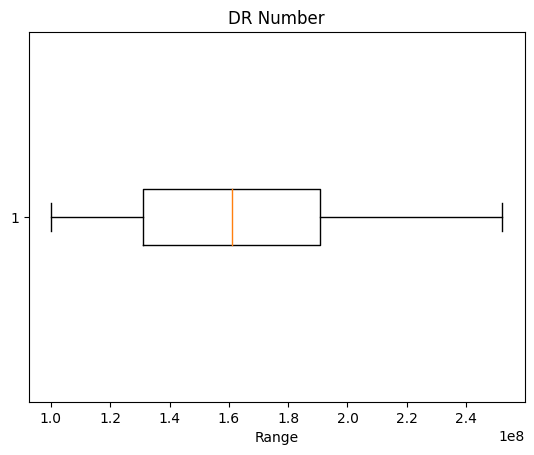

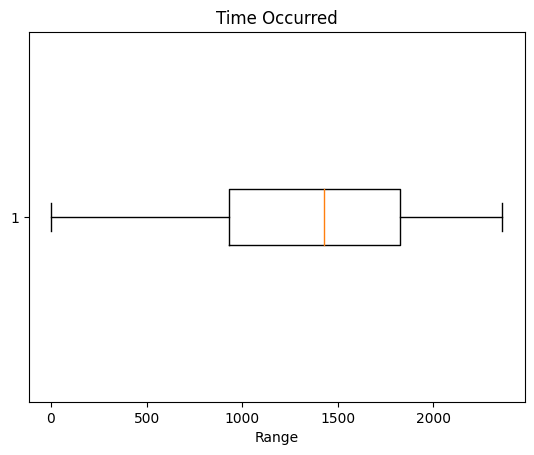

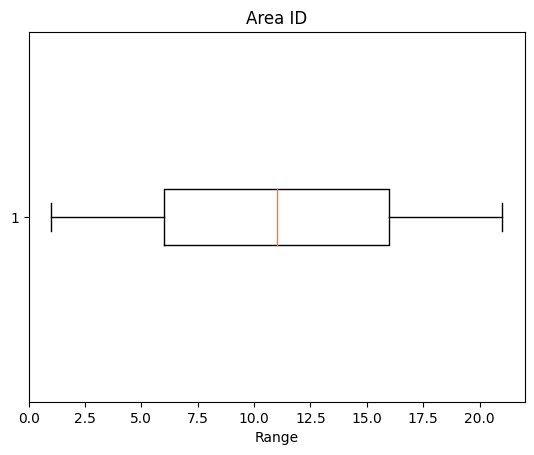

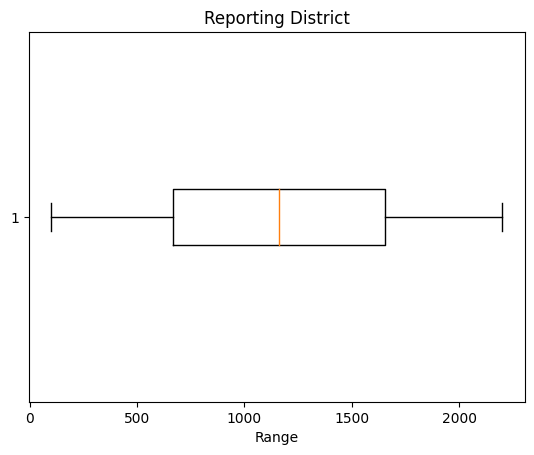

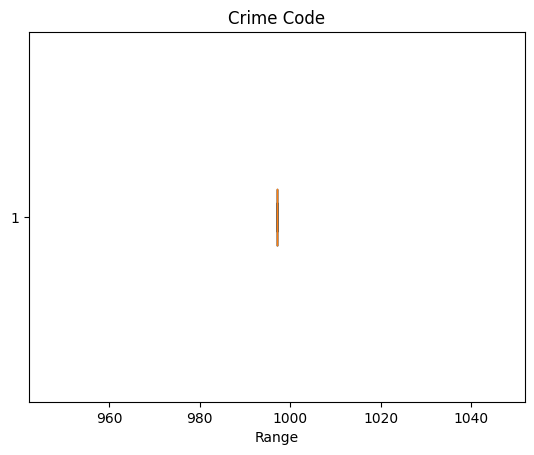

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1267: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1274: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1282: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1283: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


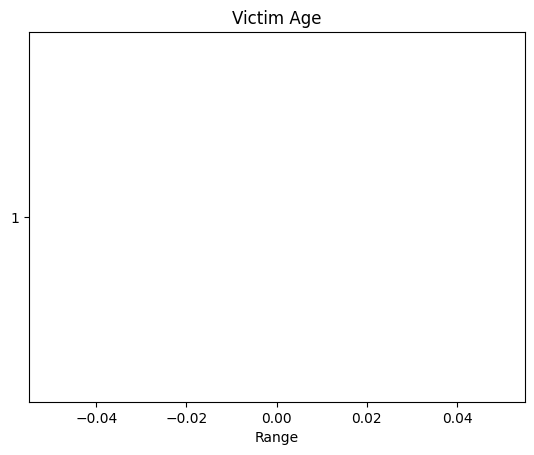

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1267: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1274: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1282: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1283: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


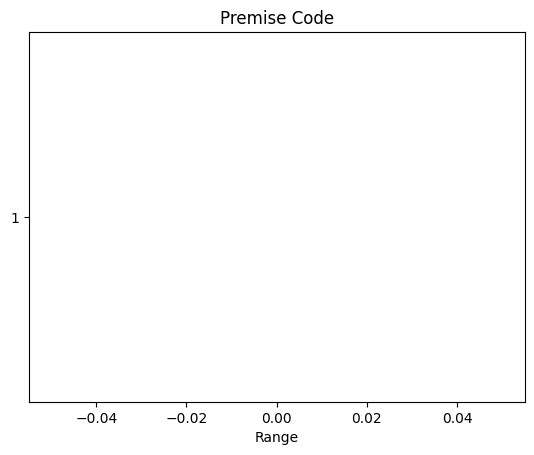

In [7]:
#to check if there are oultiers
col_numeric = ['DR Number','Time Occurred','Area ID','Reporting District','Crime Code','Victim Age','Premise Code']

for col in col_numeric:

  plt.boxplot(traffic_coll_df[col], vert=False)
  plt.title(col)
  plt.xlabel('Range')
  plt.show()

  # q1 = traffic_coll_df[col].quantile(0.25)
  # q3 = traffic_coll_df[col].quantile(0.75)
  # iqr = q3 - q1

  # # Identify outliers using IQR method
  # lower_bound = q3 + (1.5 * iqr)
  # upper_bound = q1 - (1.5 * iqr)
  # traffic_coll_df[col] = traffic_coll_df[col].clip(lower_bound,upper_bound)


In [8]:
#preprocessing the data
traffic_coll_df.drop_duplicates(inplace=True)

#Find count of missing values
missing_values = traffic_coll_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 DR Number                     0
Date Reported                 0
Date Occurred                 0
Time Occurred                 0
Area ID                       0
Area Name                     0
Reporting District            0
Crime Code                    0
Crime Code Description        0
MO Codes                  87302
Victim Age                87926
Victim Sex                10652
Victim Descent            11604
Premise Code                959
Premise Description         960
Address                       0
Cross Street              29363
Location                      0
dtype: int64


In [9]:
traffic_coll_df['MO Codes'].bfill(inplace=True)
traffic_coll_df['Victim Age'].bfill(inplace=True)
traffic_coll_df['Victim Sex'].bfill(inplace=True)
traffic_coll_df['Victim Descent'].bfill(inplace=True)
traffic_coll_df['Premise Code'].bfill(inplace=True)
traffic_coll_df['Cross Street'].bfill(inplace=True)

traffic_coll_df.dropna(subset=['Premise Description'],inplace=True)


<ipython-input-9-a280fe22b19c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traffic_coll_df['MO Codes'].bfill(inplace=True)
<ipython-input-9-a280fe22b19c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [10]:
#Find count of missing values
missing_values = traffic_coll_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 DR Number                 0
Date Reported             0
Date Occurred             0
Time Occurred             0
Area ID                   0
Area Name                 0
Reporting District        0
Crime Code                0
Crime Code Description    0
MO Codes                  0
Victim Age                0
Victim Sex                0
Victim Descent            0
Premise Code              0
Premise Description       0
Address                   0
Cross Street              0
Location                  0
dtype: int64


In [11]:
print(set(traffic_coll_df['Area Name']))

{'N Hollywood', 'Northeast', 'Hollenbeck', 'Harbor', '77th Street', 'Newton', 'Van Nuys', 'Central', 'Southwest', 'West LA', 'Mission', 'Olympic', 'Topanga', 'Southeast', 'Foothill', 'Wilshire', 'Hollywood', 'West Valley', 'Pacific', 'Devonshire', 'Rampart'}


In [12]:
#remove uncessary space between and leading/trailing space in strings
col_strings = ['Address', 'Cross Street']

for col in col_strings:
  traffic_coll_df[col] = traffic_coll_df[col].str.split().str.join(' ').str.strip()

In [13]:
print(traffic_coll_df['Address'].value_counts().unique)

<bound method Series.unique of Address
WESTERN AV          8357
SHERMAN WY          7287
VENTURA BL          7274
SEPULVEDA BL        7036
VERMONT AV          6808
                    ... 
HILLOCK ST             1
10700 OXNARD ST        1
FLOYD TR               1
12500 VICTORY BL       1
5400 SATSUMA AV        1
Name: count, Length: 29389, dtype: int64>


In [14]:
print(traffic_coll_df['Cross Street'].value_counts().unique)
print(traffic_coll_df['Victim Age'].value_counts().unique)

<bound method Series.unique of Cross Street
VERMONT AV          4835
FIGUEROA ST         4703
WESTERN AV          4536
SHERMAN WY          3781
BROADWAY            3750
                    ... 
SAN FELICIANO ST       1
MOBERLY ST             1
E PARK VIEW ST         1
S DEL MAR AV           1
OSTIN AV               1
Name: count, Length: 21362, dtype: int64>
<bound method Series.unique of Victim Age
30.0    21465
25.0    19339
40.0    17784
35.0    17134
27.0    17038
        ...  
95.0       68
93.0       68
98.0       54
96.0       52
97.0       41
Name: count, Length: 90, dtype: int64>


In [15]:
#dropping data where the victim age is more than 90  and those who are less than 15 to clean the data a little and get better info
traffic_coll_df = traffic_coll_df[traffic_coll_df['Victim Age'] <= 90]
traffic_coll_df = traffic_coll_df[traffic_coll_df['Victim Age'] >= 15]
print(traffic_coll_df['Victim Age'].value_counts().unique)

<bound method Series.unique of Victim Age
30.0    21465
25.0    19339
40.0    17784
35.0    17134
27.0    17038
        ...  
87.0      347
88.0      275
15.0      247
89.0      246
90.0      245
Name: count, Length: 76, dtype: int64>


In [16]:
print(traffic_coll_df['Crime Code Description'].value_counts().unique)
print(traffic_coll_df['Victim Sex'].value_counts().unique)
print(traffic_coll_df['Reporting District'].value_counts().unique)
print(traffic_coll_df['Premise Description'].value_counts().unique)

<bound method Series.unique of Crime Code Description
TRAFFIC COLLISION    606497
Name: count, dtype: int64>
<bound method Series.unique of Victim Sex
M    362283
F    227448
X     16571
H       183
N        11
-         1
Name: count, dtype: int64>
<bound method Series.unique of Reporting District
645     2698
1494    2519
111     2415
646     2386
1309    2386
        ... 
2199       1
959        1
252        1
1082       1
1671       1
Name: count, Length: 1333, dtype: int64>
<bound method Series.unique of Premise Description
STREET                                     578570
PARKING LOT                                 18750
SIDEWALK                                     3683
ALLEY                                        1149
DRIVEWAY                                     1094
                                            ...  
PRIVATE SCHOOL/PRESCHOOL                        1
OTHER RR TRAIN (UNION PAC, SANTE FE ETC         1
PAWN SHOP                                       1
RIVER BED*     

In [17]:
#dropping the data for reporting district that has less than 80 samples.
district_count = traffic_coll_df['Reporting District'].value_counts()
# print(district_count)

count = district_count[district_count >= 150].index
traffic_coll_df = traffic_coll_df[traffic_coll_df['Reporting District'].isin(count)]

premise_count = traffic_coll_df['Premise Description'].value_counts()
premises = premise_count[premise_count >= 100].index
traffic_coll_df = traffic_coll_df[traffic_coll_df['Premise Description'].isin(premises)]

print(traffic_coll_df['Reporting District'].value_counts().unique)
print(traffic_coll_df['Premise Description'].value_counts().unique)


<bound method Series.unique of Reporting District
645     2689
1494    2511
111     2413
1309    2382
646     2373
        ... 
1146     155
1476     153
2101     153
589      151
1707     151
Name: count, Length: 1024, dtype: int64>
<bound method Series.unique of Premise Description
STREET                               567533
PARKING LOT                           18420
SIDEWALK                               3621
ALLEY                                  1136
DRIVEWAY                               1064
FREEWAY                                 542
GAS STATION                             353
SINGLE FAMILY DWELLING                  353
TRANSPORTATION FACILITY (AIRPORT)       217
OTHER PREMISE                           190
GARAGE/CARPORT                          160
PARK/PLAYGROUND                         128
OTHER/OUTSIDE                           126
PEDESTRIAN OVERCROSSING                 120
Name: count, dtype: int64>


In [18]:
#dropping the data from the dataset that has '-' as the descent as it gives no info
traffic_coll_df = traffic_coll_df[traffic_coll_df['Victim Descent'].str.contains('-|G|S|D|L|O')==False]
print(traffic_coll_df['Victim Descent'].value_counts().unique)

#dropping the data where victim sex is not F, M or X based on the data
traffic_coll_df = traffic_coll_df[traffic_coll_df['Victim Sex'].str.contains('H|N|X')==False]
print(traffic_coll_df['Victim Sex'].value_counts().unique)


<bound method Series.unique of Victim Descent
H    231120
W    137572
B     81658
X     28394
A     22171
K      4581
F      1750
C       906
U       450
J       344
V       244
P       210
I       180
Z       163
Name: count, dtype: int64>
<bound method Series.unique of Victim Sex
M    297363
F    196213
Name: count, dtype: int64>


In [19]:
#encoding the categorical data

label_encoder = LabelEncoder()

traffic_coll_df['Victim Descent Encoded'] = label_encoder.fit_transform(traffic_coll_df['Victim Descent'])
traffic_coll_df['Victim Sex Encoded'] = label_encoder.fit_transform(traffic_coll_df['Victim Sex'])


In [20]:
traffic_coll_df

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location,Victim Descent Encoded,Victim Sex Encoded
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)",4,1
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)",4,0
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,21.0,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)",12,1
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)",4,1
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619942,242013958,12/12/2024,12/11/2024,2130,20,Olympic,2029,997,TRAFFIC COLLISION,3008 3025 3029 4027,36.0,M,H,101.0,STREET,VIRGIL AV,4TH ST,"(34.0667, -118.2871)",4,1
619943,240513204,12/10/2024,12/09/2024,1430,5,Harbor,584,997,TRAFFIC COLLISION,3006 3028 4024 3034,47.0,M,W,101.0,STREET,SILVIUS AV,W 36TH ST,"(33.7167, -118.3099)",11,1
619944,240218046,12/12/2024,12/11/2024,1000,2,Rampart,256,997,TRAFFIC COLLISION,0605 3006 3028 3032 3035 3037 3102 4024,40.0,F,H,108.0,PARKING LOT,W 6TH ST,BURLINGTON AV,"(34.0579, -118.2711)",4,0
619945,240317004,12/14/2024,09/07/2024,200,3,Southwest,325,997,TRAFFIC COLLISION,4025 3004 3028 3030,37.0,M,H,101.0,STREET,VERMONT,29TH,"(34.0284, -118.2915)",4,1


In [21]:
# identify uncorrelated and correlated features using the .corr method.

correlation_df = traffic_coll_df[['Time Occurred', 'Area ID', 'Reporting District', 'Victim Age', 'Victim Descent Encoded', 'Victim Sex Encoded', 'Premise Code']]

correlation_matrix = correlation_df.corr()

In [22]:
print("Correlation Matrix:")
print(correlation_matrix)


not_correlated_features = correlation_matrix[(correlation_matrix > -0.1) & (correlation_matrix < 0.1)]
print("\nNot correlated features Data:")
print(not_correlated_features)

Correlation Matrix:
                        Time Occurred   Area ID  Reporting District  \
Time Occurred                1.000000  0.010883            0.010956   
Area ID                      0.010883  1.000000            0.998939   
Reporting District           0.010956  0.998939            1.000000   
Victim Age                  -0.013537  0.009509            0.009636   
Victim Descent Encoded      -0.003966  0.018024            0.017366   
Victim Sex Encoded          -0.016761 -0.009445           -0.009657   
Premise Code                -0.002210  0.003068            0.003169   

                        Victim Age  Victim Descent Encoded  \
Time Occurred            -0.013537               -0.003966   
Area ID                   0.009509                0.018024   
Reporting District        0.009636                0.017366   
Victim Age                1.000000                0.052037   
Victim Descent Encoded    0.052037                1.000000   
Victim Sex Encoded        0.029159     

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


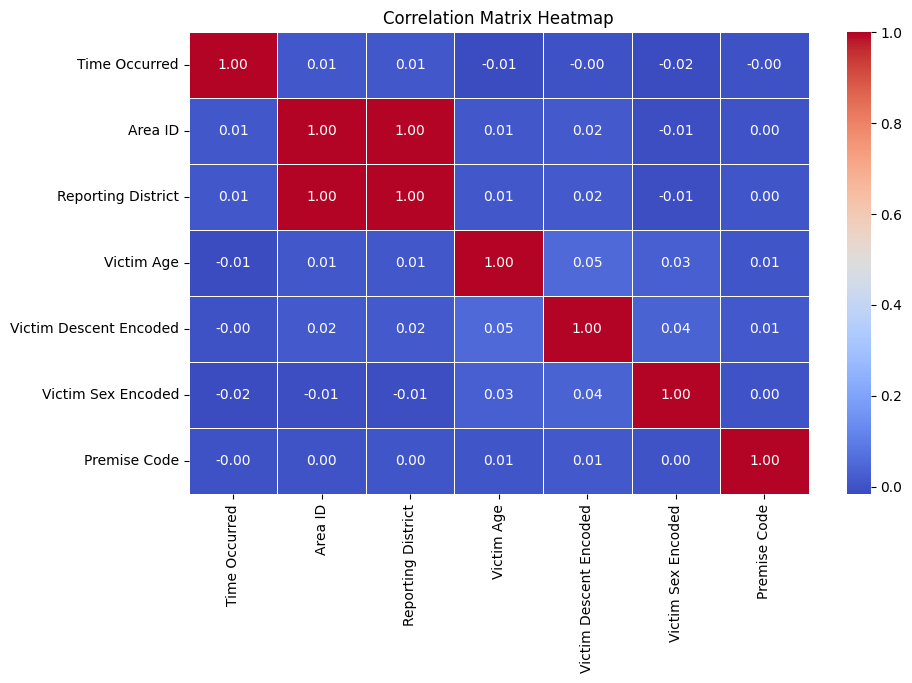

In [23]:
#vizualize the correlation matrix
#graph1
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Visualizations

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


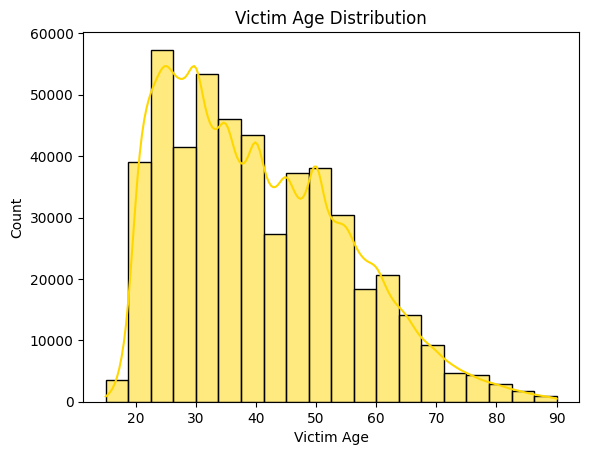

In [24]:
#graph2
sns.histplot(traffic_coll_df['Victim Age'], kde=True, bins=20, color='gold')
plt.title('Victim Age Distribution')
plt.show()

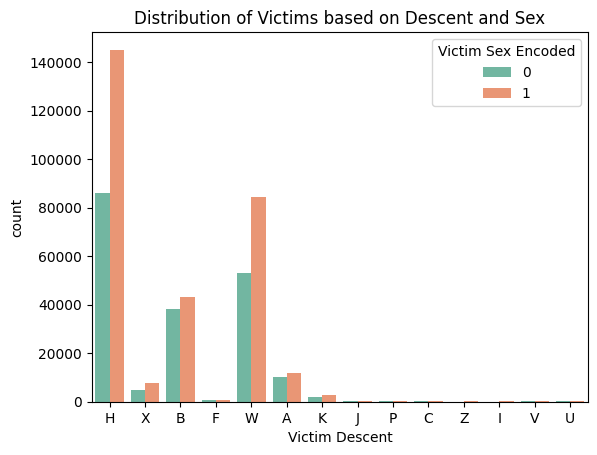

In [25]:
#graph3
sns.countplot(x='Victim Descent', hue='Victim Sex Encoded', data=traffic_coll_df, palette='Set2')
plt.title('Distribution of Victims based on Descent and Sex')
plt.show()


In [26]:
#splitting the location into longitude and latitude points

traffic_coll_df['Location'] = traffic_coll_df['Location'].str.replace(r'[()]', '', regex=True)

traffic_coll_df[['Latitude','Longitude']] = traffic_coll_df['Location'].str.split(',',expand = True)
# traffic_coll_df

# sns.scatterplot(data=traffic_coll_df, x='Longitude', y='Latitude', hue='Address')
# plt.title('Scatter Plot of the Locations')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()

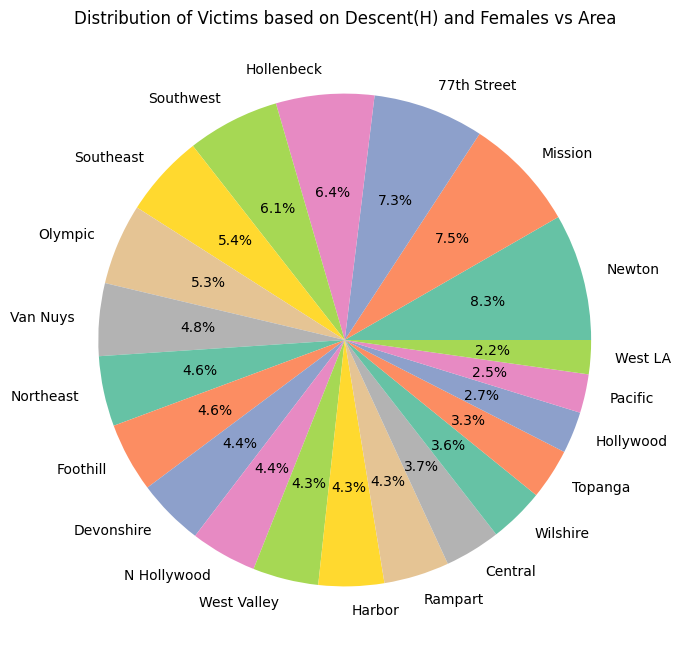

In [27]:
#graph4
filtered_df = traffic_coll_df[(traffic_coll_df['Victim Descent'] == 'H') & (traffic_coll_df['Victim Sex'] == 'F')]

# Count incidents by Area Name
area_totals = filtered_df['Area Name'].value_counts()
# print(area_totals)

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(area_totals, labels=area_totals.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of Victims based on Descent(H) and Females vs Area')
plt.show()

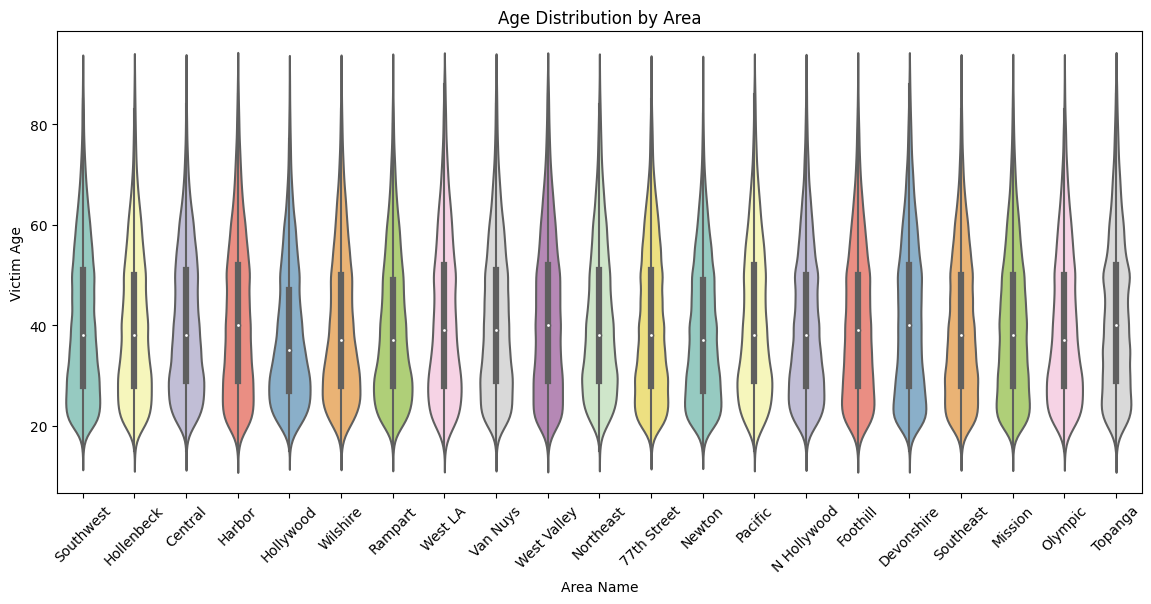

In [28]:
#graph5
#violin plot for Victim Age vs Area Name
plt.figure(figsize=(14, 6))
sns.violinplot(x='Area Name', y='Victim Age', data=traffic_coll_df, palette='Set3')
plt.title('Age Distribution by Area')
plt.xlabel('Area Name')
plt.ylabel('Victim Age')
plt.xticks(rotation=45)
plt.show()


In [29]:
traffic_coll_df.dtypes

DR Number                   int64
Date Reported              object
Date Occurred              object
Time Occurred               int64
Area ID                     int64
Area Name                  object
Reporting District          int64
Crime Code                  int64
Crime Code Description     object
MO Codes                   object
Victim Age                float64
Victim Sex                 object
Victim Descent             object
Premise Code              float64
Premise Description        object
Address                    object
Cross Street               object
Location                   object
Victim Descent Encoded      int64
Victim Sex Encoded          int64
Latitude                   object
Longitude                  object
dtype: object

In [30]:
# #normalizaiton of just victim age since everything else is necessary the way it is
# col_numeric = ['Victim Age']

# scaler = MinMaxScaler()
# traffic_coll_df[col_numeric] = scaler.fit_transform(traffic_coll_df[col_numeric])

In [31]:
#one hot encodeing of area name
traffic_coll_df_encoded = pd.get_dummies(traffic_coll_df, columns=['Area Name'], drop_first=False)

Choosing y and x for ML training

Classfication task


In [32]:
#creating bins for the classificaion of the age into 3 groups
bins = [0,18, 40, np.inf]  # split the age between 18, 50 and then the rest
labels = ['Youth', 'Adults', 'Seniors']

traffic_coll_df_encoded['Age Group'] = pd.cut(traffic_coll_df_encoded['Victim Age'], bins=bins, labels=labels)

traffic_coll_df_encoded['Age Group'].value_counts()


Age Group
Adults     270899
Seniors    219061
Youth        3616
Name: count, dtype: int64

In [33]:
# Define features (X) and target variable (y)
X = traffic_coll_df_encoded.drop(columns=['Victim Age','Age Group','DR Number','Date Occurred','Date Reported', 'Address', 'Crime Code Description', 'MO Codes', 'Victim Descent', 'Victim Sex', 'Premise Description', 'Cross Street', 'Location'])
y = traffic_coll_df_encoded['Age Group']


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


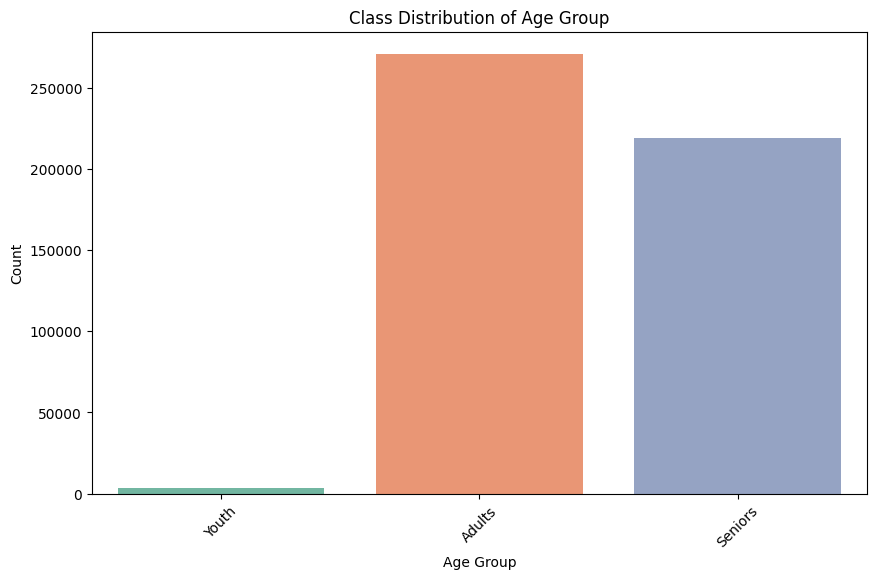

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y, palette='Set2')
plt.title('Class Distribution of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#  handle class imbalance
smote = SMOTE(random_state=42)

X_new, y_new = smote.fit_resample(X, y)

print(f"Original class distribution: {Counter(y)}")
print(f"Resampled class distribution: {Counter(y_new)}")


Original class distribution: Counter({'Adults': 270899, 'Seniors': 219061, 'Youth': 3616})
Resampled class distribution: Counter({'Adults': 270899, 'Seniors': 270899, 'Youth': 270899})


In [36]:
from sklearn.model_selection import train_test_split

# split ratio of traingin(80%), validation (10%), and testing (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss
import time

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=200, class_weight='balanced')

start_time = time.time()

rf_classifier.fit(X_train, y_train)

y_pred_val = rf_classifier.predict(X_val)
y_pred_test = rf_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test_rf = accuracy_score(y_test, y_pred_test)

print("Random Forest Classifier - Validation Set Accuracy: ", accuracy_val)
print("Random Forest Classifier - Test Set Accuracy: ", accuracy_test_rf)

# Classification report for detailed performance metrics
print("\nClassification Report for Validation Set:")
print(classification_report(y_val, y_pred_val))

print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred_test))

# accuracy_rf = accuracy_score(y_test, y_pred_test)
loss_rf = log_loss(y_test, rf_classifier.predict_proba(X_test))

# Measure time taken
time_rf = time.time() - start_time

# print(f"Random Forest - Test Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - Loss: {loss_rf:.4f}")
print(f"Random Forest - Training Time: {time_rf:.4f} seconds")


Random Forest Classifier - Validation Set Accuracy:  0.7034330011074197
Random Forest Classifier - Test Set Accuracy:  0.6975513719699766

Classification Report for Validation Set:
              precision    recall  f1-score   support

      Adults       0.57      0.58      0.57     26962
     Seniors       0.57      0.55      0.56     27098
       Youth       0.96      0.99      0.97     27210

    accuracy                           0.70     81270
   macro avg       0.70      0.70      0.70     81270
weighted avg       0.70      0.70      0.70     81270


Classification Report for Test Set:
              precision    recall  f1-score   support

      Adults       0.57      0.57      0.57     27076
     Seniors       0.56      0.54      0.55     27179
       Youth       0.95      0.98      0.97     27015

    accuracy                           0.70     81270
   macro avg       0.69      0.70      0.70     81270
weighted avg       0.69      0.70      0.70     81270

Random Forest - Loss

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss

log_reg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, penalty='elasticnet',l1_ratio=0.5)

start_time = time.time()

log_reg.fit(X_train, y_train)

y_pred_val_log_reg = log_reg.predict(X_val)
y_pred_test_log_reg = log_reg.predict(X_test)

accuracy_val_log_reg = accuracy_score(y_val, y_pred_val_log_reg)
accuracy_test_log_reg = accuracy_score(y_test, y_pred_test_log_reg)

# accuracy_lr = accuracy_score(y_test, y_pred_test_log_reg)
loss_lr = log_loss(y_test, log_reg.predict_proba(X_test))

# Measure time taken
time_lr = time.time() - start_time

# print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression - Loss: {loss_lr:.4f}")
print(f"Logistic Regression - Training Time: {time_lr:.4f} seconds")

print("Logistic Regression - Validation Set Accuracy: ", accuracy_val_log_reg)
print("Logistic Regression - Test Set Accuracy: ", accuracy_test_log_reg)

print("\nClassification Report for Logistic Regression (Validation Set):")
print(classification_report(y_val, y_pred_val_log_reg))

print("\nClassification Report for Logistic Regression (Test Set):")
print(classification_report(y_test, y_pred_test_log_reg))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression - Loss: 1.0662
Logistic Regression - Training Time: 858.9940 seconds
Logistic Regression - Validation Set Accuracy:  0.4141995816414421
Logistic Regression - Test Set Accuracy:  0.4150855174110988

Classification Report for Logistic Regression (Validation Set):
              precision    recall  f1-score   support

      Adults       0.38      0.32      0.35     26962
     Seniors       0.40      0.34      0.36     27098
       Youth       0.45      0.58      0.51     27210

    accuracy                           0.41     81270
   macro avg       0.41      0.41      0.41     81270
weighted avg       0.41      0.41      0.41     81270


Classification Report for Logistic Regression (Test Set):
              precision    recall  f1-score   support

      Adults       0.38      0.33      0.35     27076
     Seniors       0.40      0.33      0.36     27179
       Youth       0.45      0.59      0.51     27015

    accuracy                           0.42     81270
   mac

In [39]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report


# nb_model = GaussianNB()

# nb_model.fit(X_train, y_train)

# y_pred = nb_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: ", accuracy)

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # # Confusion matrix for better insight (optional)
# # from sklearn.metrics import confusion_matrix
# # import seaborn as sns
# # import matplotlib.pyplot as plt

# # cm = confusion_matrix(y_test, y_pred)
# # sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
# # plt.xlabel('Predicted')
# # plt.ylabel('True')
# # plt.title('Confusion Matrix for Naive Bayes')
# # plt.show()


In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

start_time = time.time()

gb_model.fit(X_train, y_train)

y_val_pred_gb = gb_model.predict(X_val)
y_test_pred_gb = gb_model.predict(X_test)

accuracy_val_gb = accuracy_score(y_val, y_val_pred_gb)
accuracy_test_gb = accuracy_score(y_test, y_test_pred_gb)

print(f" Validation Accuracy: {accuracy_val_gb:.4f}")
print(f" Test Accuracy: {accuracy_test_gb:.4f}")

loss_val_gb = log_loss(y_val, gb_model.predict_proba(X_val))
loss_test_gb = log_loss(y_test, gb_model.predict_proba(X_test))

print(f"Validation Set - Log Loss: {loss_val_gb:.4f}")
print(f"Test Set - Log Loss: {loss_test_gb:.4f}")

time_gb = time.time() - start_time

# Print classification report for detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_gb))

# print(f"Gradient Boosting - Accuracy: {accuracy_gb:.4f}")
# print(f"Gradient Boosting - Loss: {loss_gb:.4f}")
print(f"Gradient Boosting - Training Time: {time_gb:.4f} seconds")


 Validation Accuracy: 0.5433
 Test Accuracy: 0.5403
Validation Set - Log Loss: 0.9088
Test Set - Log Loss: 0.9100

Classification Report:
              precision    recall  f1-score   support

      Adults       0.45      0.57      0.50     27076
     Seniors       0.49      0.43      0.46     27179
       Youth       0.74      0.62      0.67     27015

    accuracy                           0.54     81270
   macro avg       0.56      0.54      0.54     81270
weighted avg       0.56      0.54      0.54     81270

Gradient Boosting - Training Time: 355.7824 seconds


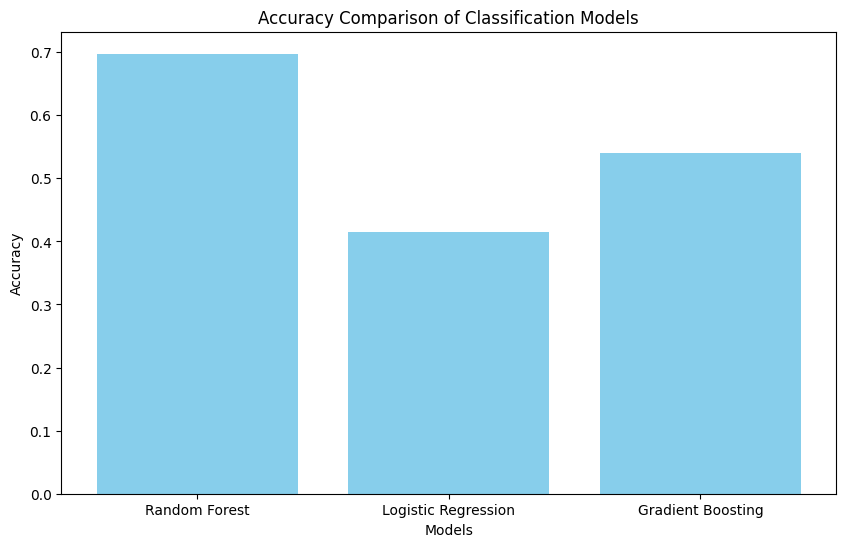

In [41]:
accuracies = [accuracy_test_rf, accuracy_test_log_reg, accuracy_test_gb]
models = ['Random Forest', 'Logistic Regression', 'Gradient Boosting']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classification Models')
plt.show()


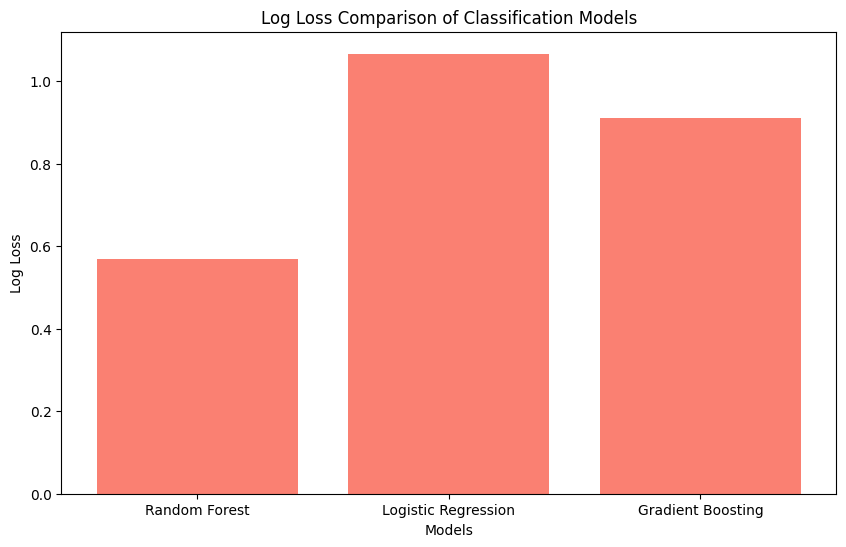

In [42]:
log_losses = [loss_rf, loss_lr, loss_test_gb]

plt.figure(figsize=(10, 6))
plt.bar(models, log_losses, color='salmon')
plt.xlabel('Models')
plt.ylabel('Log Loss')
plt.title('Log Loss Comparison of Classification Models')
plt.show()

In [44]:
#fidning the best model and weights
pickle.dump(rf_classifier, open( "a0_part_2_ra65.pt", "wb" ) )
# torch.save(rf_classifier.state_dict(), "a0_part2_ra65.pt")

# Neural Networks

In [45]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")



Using device: cuda


In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset

# # Prepare the data (same as before, assuming X_encoded and y_encoded are ready)
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)

X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


train_losses_nn = []
val_losses_nn = []
train_accuracy_nn = []
val_accuracy_nn = []

class NNModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64) 
        self.fc2 = nn.Linear(64, 128) 
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 512)
        self.fc5 = nn.Linear(512, output_dim) 
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        # self.softmax = nn.Softmax(dim=1)  # For multi-class classification

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.fc5(x)
        return x
        # return self.softmax(x)

model = NNModel(X_train_scaled.shape[1], len(y.unique())).to(device)
loss_function = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 20
start_time = time.time()

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        # train_loss += loss.item()
        # train_losses_nn.append(loss.item())

    #adding validation
    model.eval()
    val_loss = 0.0
    correct_val  = 0
    
    with torch.no_grad():

        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            
            val_outputs = model(val_inputs)
            val_loss = loss_function(val_outputs, val_labels)
            val_loss += val_loss.item()
    
            # Calculate validation accuracy
            _, val_pred_classes = torch.max(val_outputs, 1)
            correct_val += (val_pred_classes == val_labels).sum().item()


    val_loss_average = val_loss / len(val_loader)
    val_accuracy = correct_val / len(val_loader.dataset)
    val_losses_nn.append(val_loss_average)
    val_accuracy_nn.append(val_accuracy)


    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {loss.item():.4f}\n'    
            f'Val Loss: {val_loss_average:.4f}\n' 
            f'Val Accuracy: {val_accuracy:.4f}')


model.eval()
test_loss = 0.0
test_accuracy = 0.0
y_preds = []
y_true = []

with torch.no_grad():

    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        y_test_output = model(inputs)
    
        test_loss = loss_function(y_test_output, labels)
        test_loss += loss.item()
        
        _, y_pred_classes = torch.max(y_test_output, 1)
        test_accuracy += (y_pred_classes == labels).sum().item()

        y_preds.extend(y_pred_classes.cpu().numpy())
        y_true.extend(labels.cpu().numpy())
    
test_loss_average = test_loss / len(test_loader)
accuracy_test_nn = test_accuracy / len(test_loader.dataset)

time_nn = time.time() - start_time
    
print(f"NN - Test Accuracy: {accuracy_test_nn:.4f}")
print(f"NN - Test Loss: {test_loss_average:.4f}")
print(f"NN - Training Time: {time_nn:.4f} seconds")

Epoch [1/20], Train Loss: 0.8446
Val Loss: 0.0014
Val Accuracy: 0.5348
Epoch [2/20], Train Loss: 0.9513
Val Loss: 0.0014
Val Accuracy: 0.5385
Epoch [3/20], Train Loss: 1.0161
Val Loss: 0.0014
Val Accuracy: 0.5433
Epoch [4/20], Train Loss: 1.0193
Val Loss: 0.0014
Val Accuracy: 0.5465
Epoch [5/20], Train Loss: 0.9594
Val Loss: 0.0014
Val Accuracy: 0.5482
Epoch [6/20], Train Loss: 0.7543
Val Loss: 0.0014
Val Accuracy: 0.5504
Epoch [7/20], Train Loss: 0.8500
Val Loss: 0.0014
Val Accuracy: 0.5527
Epoch [8/20], Train Loss: 0.8330
Val Loss: 0.0015
Val Accuracy: 0.5546
Epoch [9/20], Train Loss: 0.8787
Val Loss: 0.0014
Val Accuracy: 0.5554
Epoch [10/20], Train Loss: 0.8042
Val Loss: 0.0014
Val Accuracy: 0.5571
Epoch [11/20], Train Loss: 0.9356
Val Loss: 0.0014
Val Accuracy: 0.5579
Epoch [12/20], Train Loss: 0.8214
Val Loss: 0.0014
Val Accuracy: 0.5592
Epoch [13/20], Train Loss: 0.9949
Val Loss: 0.0014
Val Accuracy: 0.5586
Epoch [14/20], Train Loss: 0.8740
Val Loss: 0.0014
Val Accuracy: 0.5622
E

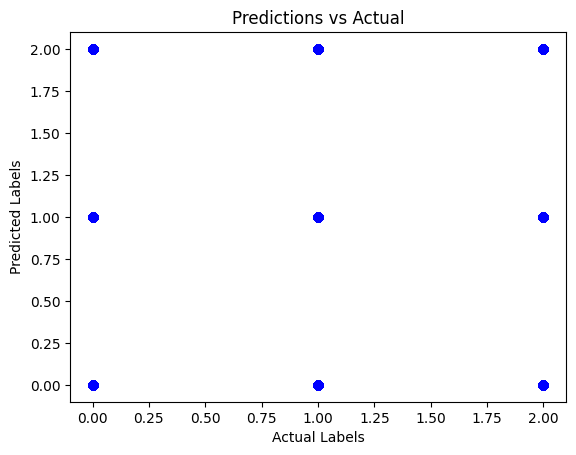

In [52]:
plt.scatter(y_true, y_preds, color='blue')
plt.title('Predictions vs Actual')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

In [ ]:
# #loss graph
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, epochs + 1), train_losses, label="Training Loss", color='blue')
# plt.title('Loss vs Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

Compare all ML models and NN model

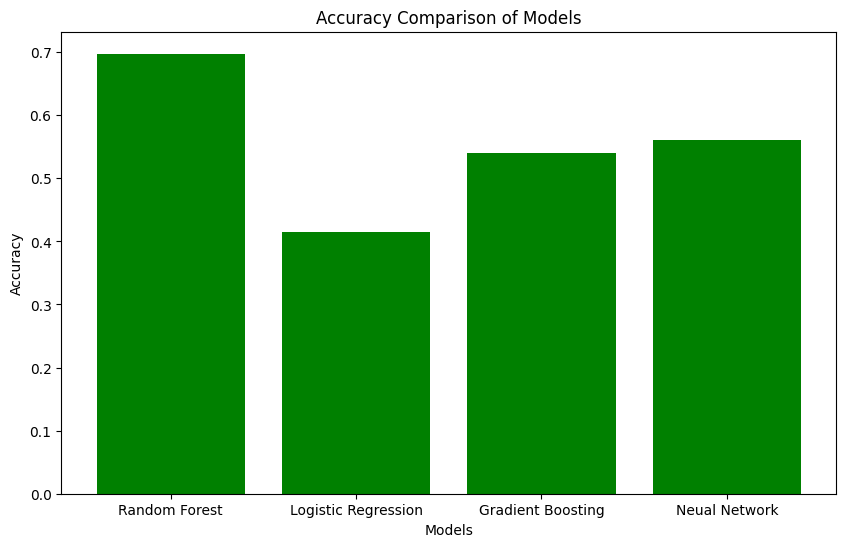

In [53]:
accuracies = [accuracy_test_rf, accuracy_test_log_reg, accuracy_test_gb, accuracy_test_nn]
models = ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'Neual Network']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='green')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.show()



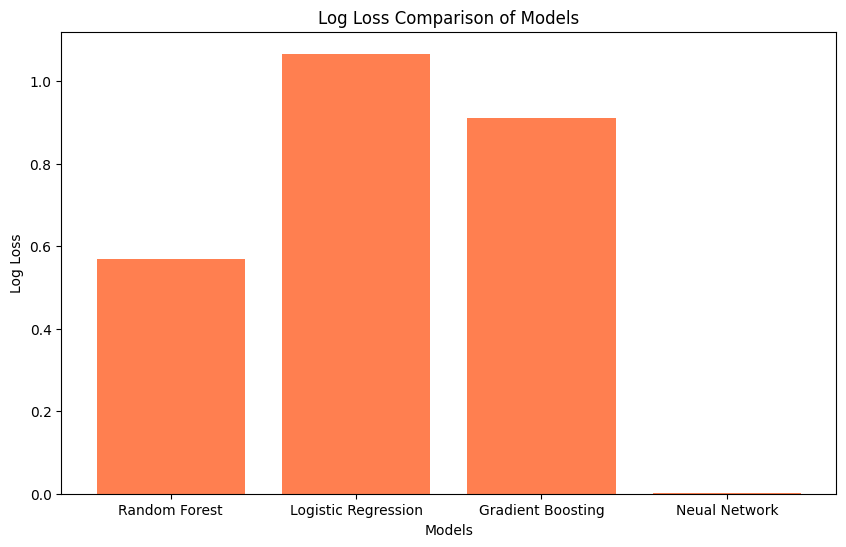

In [56]:
test_loss_average = test_loss_average.cpu().numpy() # tensor to numpy

log_losses = [loss_rf, loss_lr, loss_test_gb, test_loss_average]

plt.figure(figsize=(10, 6))
plt.bar(models, log_losses, color='coral')
plt.xlabel('Models')
plt.ylabel('Log Loss')
plt.title('Log Loss Comparison of Models')
plt.show()

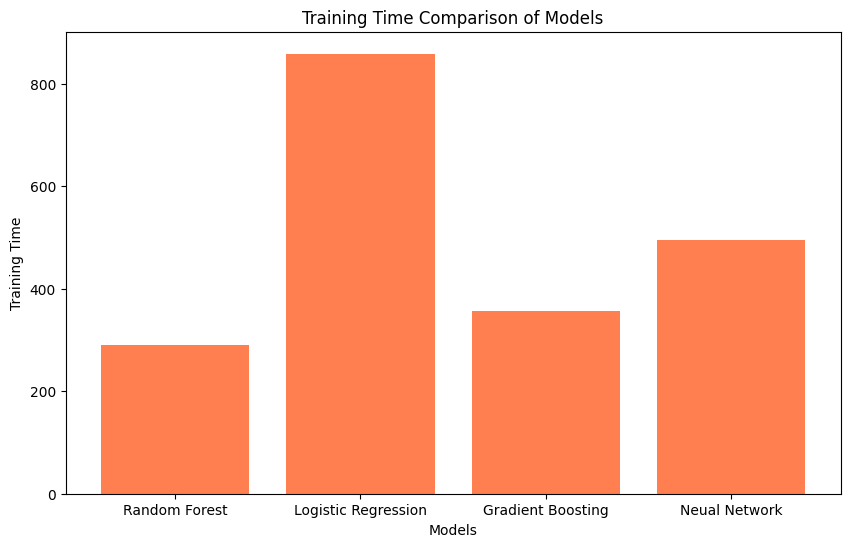

In [58]:
training_times = [time_rf, time_lr, time_gb, time_nn]

plt.figure(figsize=(10, 6))
plt.bar(models, training_times, color='coral')
plt.xlabel('Models')
plt.ylabel('Training Time')
plt.title('Training Time Comparison of Models')
plt.show()

References:
- https://www.geeksforgeeks.org/handling-missing-data-with-knn-imputer/
- https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/
- https://www.digitalocean.com/community/tutorials/python-remove-spaces-from-string
- https://www.geeksforgeeks.org/how-to-drop-rows-that-contain-a-specific-string-in-pandas/
- https://www.kaggle.com/discussions/questions-and-answers/496951
- 